In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
#1) measurement and 2)station
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [9]:
# Display columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d5591b6940>,
 'id': 1,
 'prcp': 0.08,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'tobs': 65.0}

In [10]:
# Display columns and data in dictionary format  - HELP - WHY IS IS THE ROW SET THE SAME FOR STATION AS IT IS FOR MEASUREMENT
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1d55bba7c70>,
 'longitude': -157.8168,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0}

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
session.query(func.max(Measurement.date)).all()
    



[('2017-08-23',)]

Text(0, 0.5, 'Precipitation in Inches')

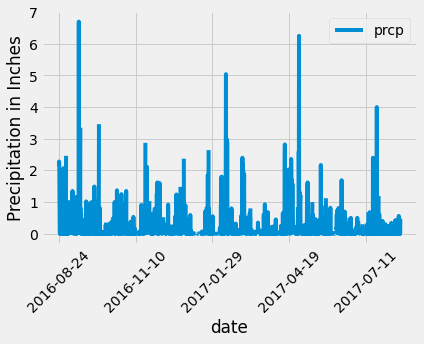

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
start_date = dt.datetime(2017, 8, 23)- dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(result, columns=['date','prcp'])

prcp_df = prcp_df.set_index('date')

prcp_df= prcp_df.sort_values(by='date',ascending = True)

prcp_df.plot(rot=45)
plt.ylabel("Precipitation in Inches")

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column

from datetime import date
measurement_df = pd.read_sql("Select * from measurement",conn)

# Sort the dataframe by date
measurement_date_df = measurement_df.set_index('date')
#measurement_date_df
measurement_df.sort_values(by='date',ascending = True)
measurement_df.head()

from datetime import date
station_df = pd.read_sql("Select * from station",conn)
station_df.head()


# MERGE measurement and station data
complete_df = pd.merge(measurement_df, station_df, on="station", how="inner")
complete_df.head()

# #Complete Dataset
# complete_df.dtypes
complete_df.describe()




NameError: name 'conn' is not defined

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#Mean

#Median

#Mode



# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset

# Display columns and data in dictionary format  - HELP - WHY IS IS THE ROW SET THE SAME FOR STATION AS IT IS FOR MEASUREMENT
station_count = session.query(func.count(Station.station)).all()

station_count

[(9,)]

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, 
   func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()





[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
data = engine.execute("Select station, count(*) group by station order by count(*)")

print("most active stations")
for record in data:
        print(record)

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()